In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv('train.csv')[['Age','Pclass','SibSp','Parch','Fare','Sex','Survived']]
df

,Age,Pclass,SibSp,Parch,Fare,Sex,Survived
0,22.0,3,1,0,7.2500,male,0
1,38.0,1,1,0,71.2833,female,1
2,26.0,3,0,0,7.9250,female,1
3,35.0,1,1,0,53.1000,female,1
4,35.0,3,0,0,8.0500,male,0
...,...,...,...,...,...,...,...
886,27.0,2,0,0,13.0000,male,0
887,19.0,1,0,0,30.0000,female,1
888,NaN,3,1,2,23.4500,female,0
889,26.0,1,0,0,30.0000,male,1


In [39]:
df1 = df.fillna(df['Age'].median())
df1

,Age,Pclass,SibSp,Parch,Fare,Sex,Survived
0,22.0,3,1,0,7.2500,male,0
1,38.0,1,1,0,71.2833,female,1
2,26.0,3,0,0,7.9250,female,1
3,35.0,1,1,0,53.1000,female,1
4,35.0,3,0,0,8.0500,male,0
...,...,...,...,...,...,...,...
886,27.0,2,0,0,13.0000,male,0
887,19.0,1,0,0,30.0000,female,1
888,28.0,3,1,2,23.4500,female,0
889,26.0,1,0,0,30.0000,male,1


In [41]:
pd1 = pd.get_dummies(df1,columns=['Sex'])
pd1

,Age,Pclass,SibSp,Parch,Fare,Survived,Sex_female,Sex_male
0,22.0,3,1,0,7.2500,0,0,1
1,38.0,1,1,0,71.2833,1,1,0
2,26.0,3,0,0,7.9250,1,1,0
3,35.0,1,1,0,53.1000,1,1,0
4,35.0,3,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...
886,27.0,2,0,0,13.0000,0,0,1
887,19.0,1,0,0,30.0000,1,1,0
888,28.0,3,1,2,23.4500,0,1,0
889,26.0,1,0,0,30.0000,1,0,1


In [42]:
x = pd1.iloc[:,0:-1]
y = pd1['Survived']

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=0)


In [44]:
x_train

,Age,Pclass,SibSp,Parch,Fare,Survived,Sex_female
140,28.0,3,0,2,15.2458,0,1
439,31.0,2,0,0,10.5000,0,0
817,31.0,2,1,1,37.0042,0,0
378,20.0,3,0,0,4.0125,0,0
491,21.0,3,0,0,7.2500,0,0
...,...,...,...,...,...,...,...
835,39.0,1,1,1,83.1583,1,1
192,19.0,3,1,0,7.8542,1,1
629,28.0,3,0,0,7.7333,0,0
559,36.0,3,1,0,17.4000,1,1


In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.fit_transform(x_test)
x_train


,Age,Pclass,SibSp,Parch,Fare,Survived,Sex_female
140,28.0,3,0,2,15.2458,0,1
439,31.0,2,0,0,10.5000,0,0
817,31.0,2,1,1,37.0042,0,0
378,20.0,3,0,0,4.0125,0,0
491,21.0,3,0,0,7.2500,0,0
...,...,...,...,...,...,...,...
835,39.0,1,1,1,83.1583,1,1
192,19.0,3,1,0,7.8542,1,1
629,28.0,3,0,0,7.7333,0,0
559,36.0,3,1,0,17.4000,1,1


In [49]:
covariance_matrix = np.cov([df.iloc[:,1],df.iloc[:,2],df.iloc[:,3],df.iloc[:,4],df.iloc[:,6]])
covariance_matrix

array([[ 6.99015120e-01,  7.65986961e-02,  1.24289083e-02,
        -2.28301962e+01, -1.37702871e-01],
       [ 7.65986961e-02,  1.21604308e+00,  3.68738572e-01,
         8.74873381e+00, -1.89535808e-02],
       [ 1.24289083e-02,  3.68738572e-01,  6.49728244e-01,
         8.66105167e+00,  3.20167972e-02],
       [-2.28301962e+01,  8.74873381e+00,  8.66105167e+00,
         2.46943685e+03,  6.22178683e+00],
       [-1.37702871e-01, -1.89535808e-02,  3.20167972e-02,
         6.22178683e+00,  2.36772217e-01]])

In [50]:
eign_value,eign_vectore = np.linalg.eig(covariance_matrix)

In [51]:
eign_value

array([2.46972502e+03, 1.38204393e+00, 1.95129881e-01, 4.58744108e-01,
       4.77464515e-01])

In [52]:
eign_vectore

array([[-9.24611395e-03, -2.02781703e-01, -2.78206511e-01,
         5.11152656e-01,  7.87475834e-01],
       [ 3.54414787e-03, -8.85290434e-01, -3.26708989e-02,
         2.41361046e-01, -3.96138541e-01],
       [ 3.50812261e-03, -4.16415045e-01,  1.09617822e-01,
        -7.86767168e-01,  4.42230210e-01],
       [ 9.99941644e-01,  2.61877352e-03, -4.37969765e-04,
         7.25571400e-03,  7.55069547e-03],
       [ 2.51985087e-03,  4.16182645e-02, -9.53686264e-01,
        -2.47815628e-01, -1.65322395e-01]])

In [56]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)



In [55]:
pca1 = PCA(n_components=5)

In [57]:
pca1.fit(pd1)

PCA(n_components=5)

In [59]:
pca_data1 = pd.DataFrame(pca1.transform(pd1),columns = ['pca1','pca2','pca3','pca4','pca5'])
pca_data1

,pca1,pca2,pca3,pca4,pca5
0,-25.151744,-6.691084,0.235913,0.826098,-0.113056
1,39.313261,7.579949,0.223386,-0.856265,-1.122326
2,-24.365851,-2.702271,-0.473649,-0.779717,0.061501
3,21.056282,5.076931,0.220252,-0.981257,-1.247161
4,-24.002382,6.297438,-0.312749,0.651715,0.416273
...,...,...,...,...,...
886,-19.262597,-1.811825,-0.674329,0.331317,-0.260290
887,-2.471993,-10.259615,-1.006626,-1.333137,-1.136894
888,-8.785237,-1.168734,1.283368,-0.868316,1.251433
889,-2.285298,-3.258224,-0.940819,-0.322897,-0.981779


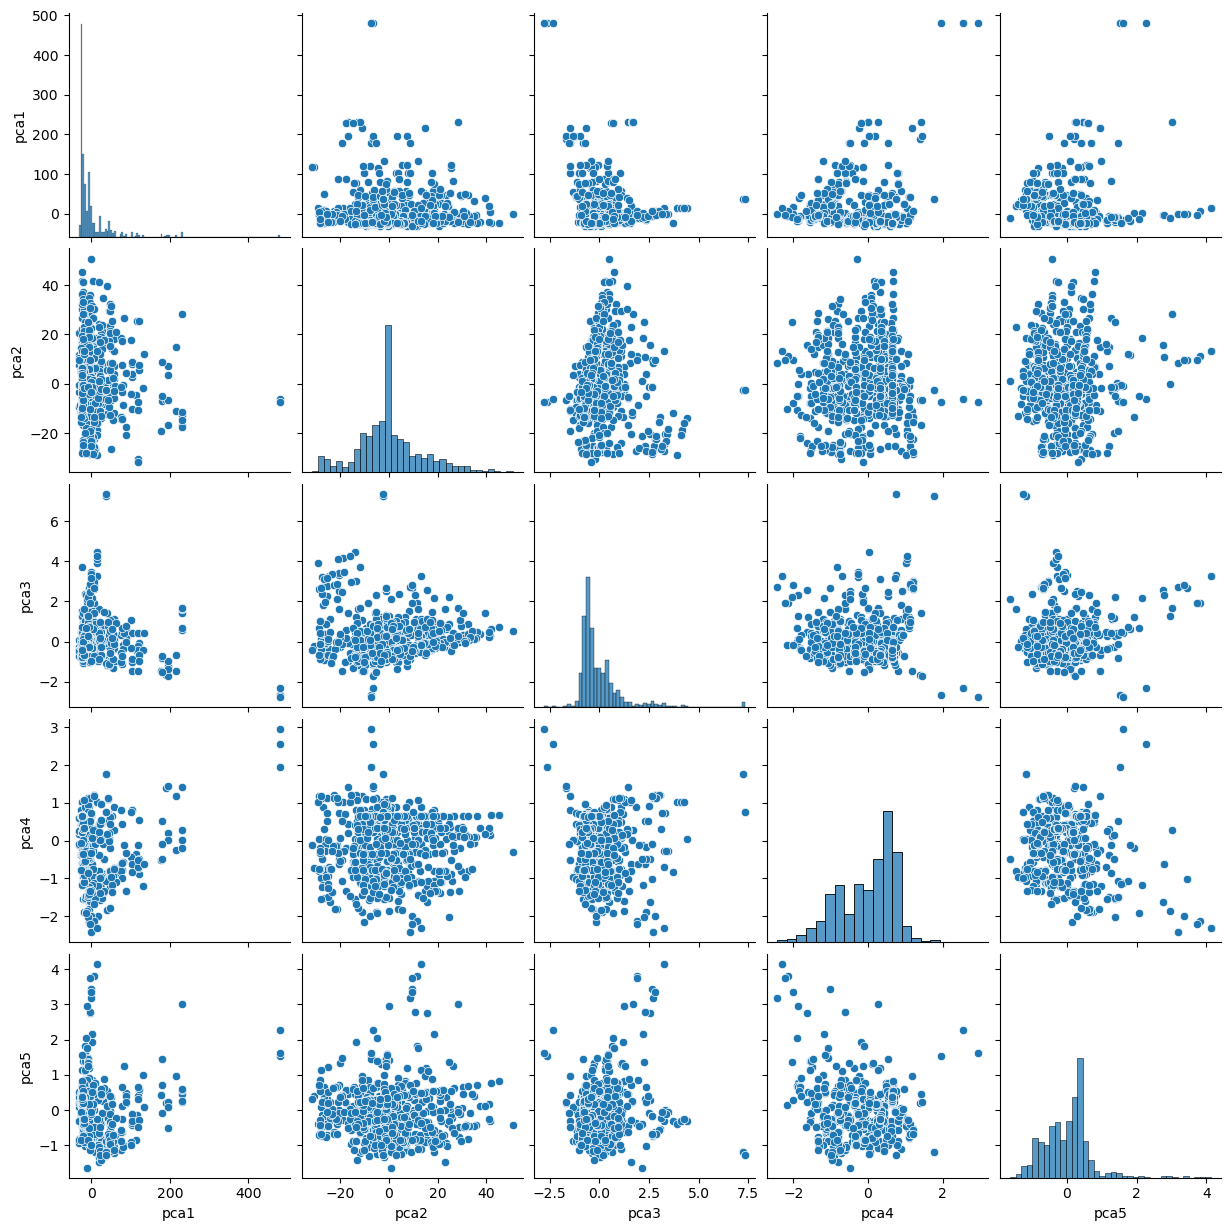

In [62]:
sns.pairplot(data = pca_data1)

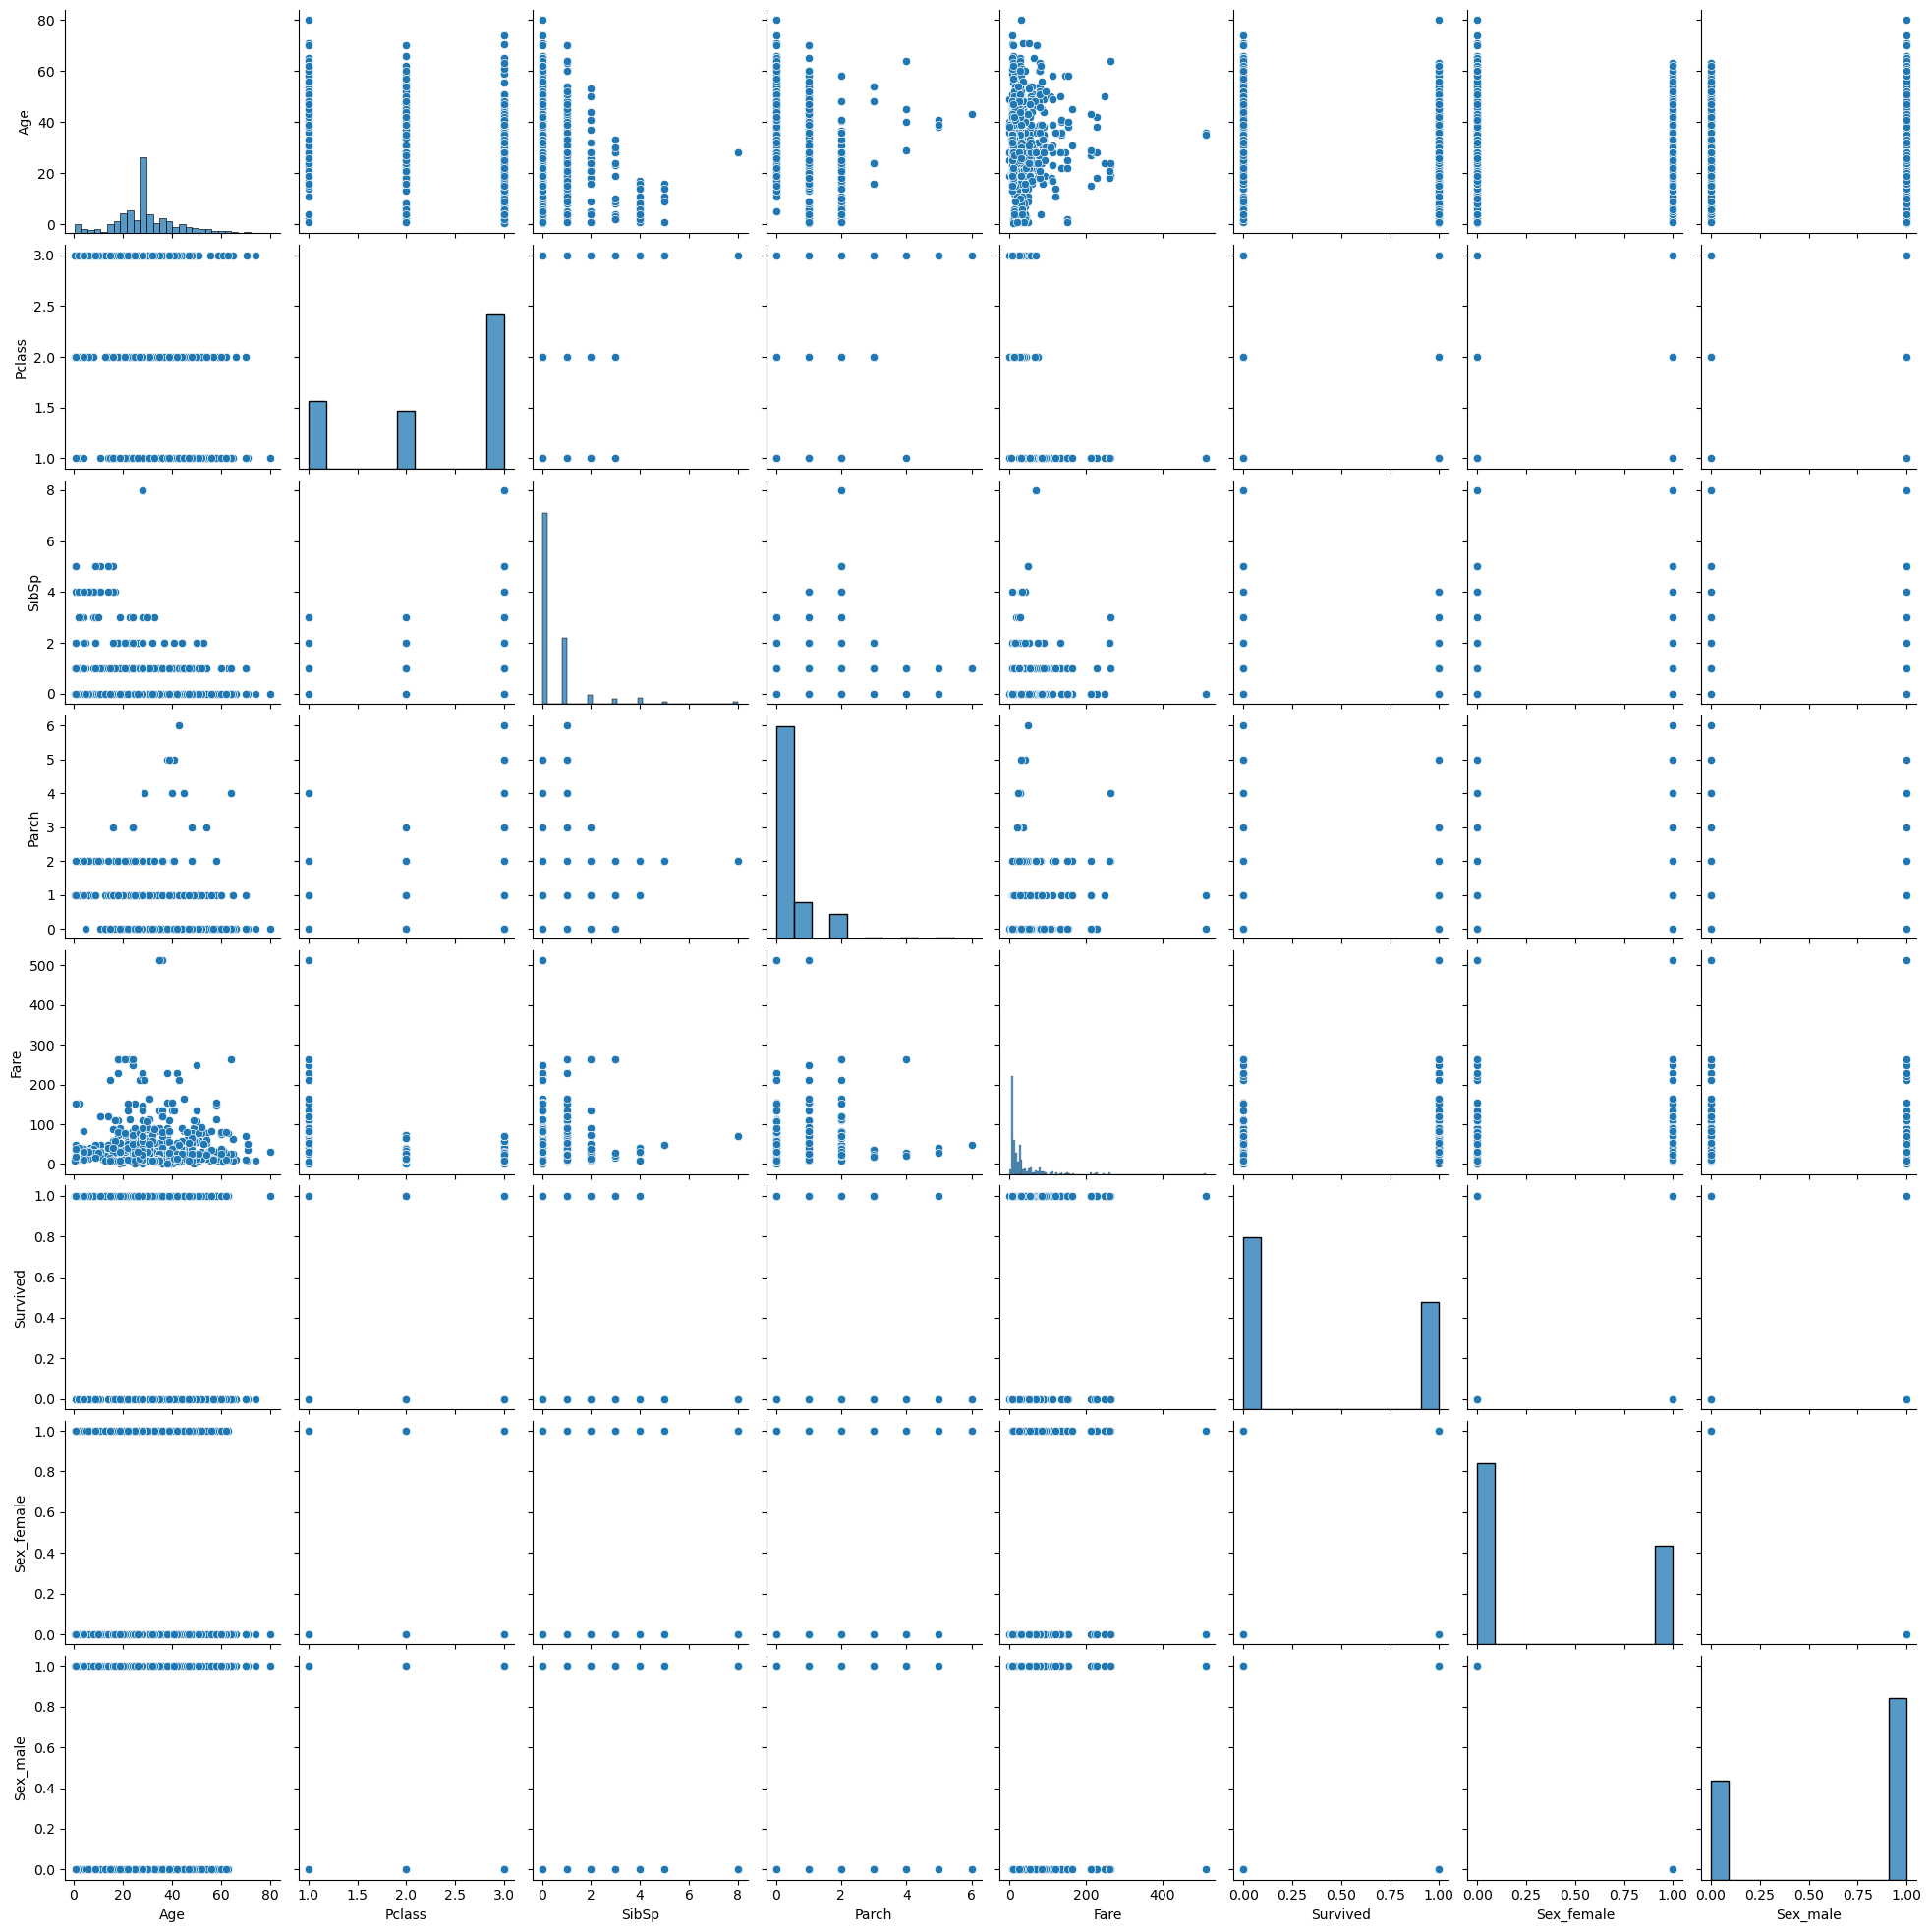

In [63]:
sns.pairplot(data = pd1)